In [25]:
import numpy as np 
import pandas as pd 

## Import Data

In [26]:
df = pd.read_csv("titanic/train.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [27]:
df.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [28]:
# Check value yang kosong

df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## Data Preprocessing

In [29]:
# Isi data kosong pada Kolom Age dengan Median
df['Age'] = df['Age'].fillna(df['Age'].median())

In [30]:
# Isi data kosong pada Kolom Embarked dengan Modus¶
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])


In [31]:
# Drop kolom Cabin karena banyak yang kosong
df = df.drop('Cabin', axis=1)

In [32]:
# Check hasil setelah di preprocess
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

# EDA

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

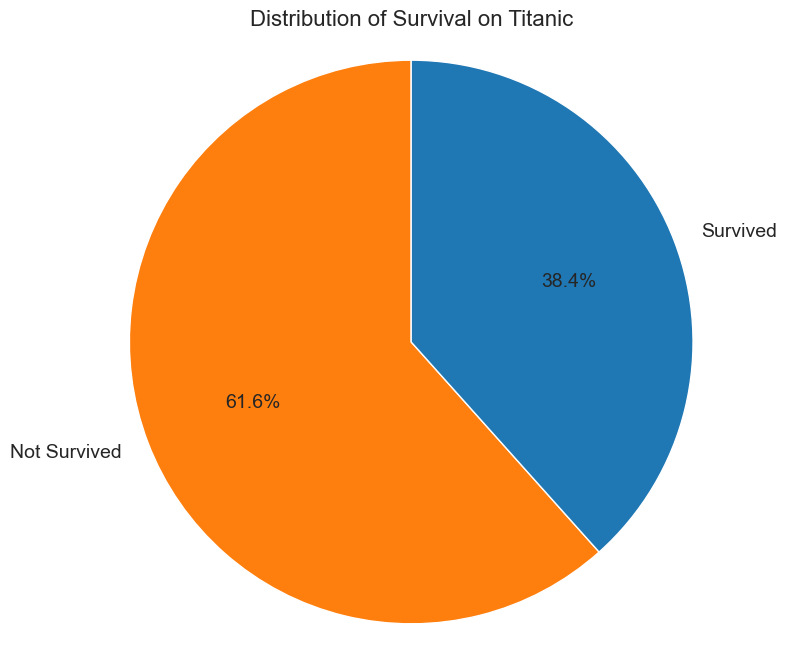

In [84]:
# Menghitung jumlah penumpang yang selamat dan tidak selamat
survived_counts = df['Survived'].value_counts()

# Membuat pie chart dengan ukuran persentase yang diperbesar
plt.figure(figsize=(8, 8))
plt.pie(survived_counts, labels=['Not Survived', 'Survived'], autopct='%1.1f%%', startangle=90, 
        colors=['#ff7f0e', '#1f77b4'], textprops={'fontsize': 14})  # Mengubah ukuran font
plt.title('Distribution of Survival on Titanic', fontsize=16)
plt.axis('equal')  # Menjaga proporsi lingkaran
plt.show()

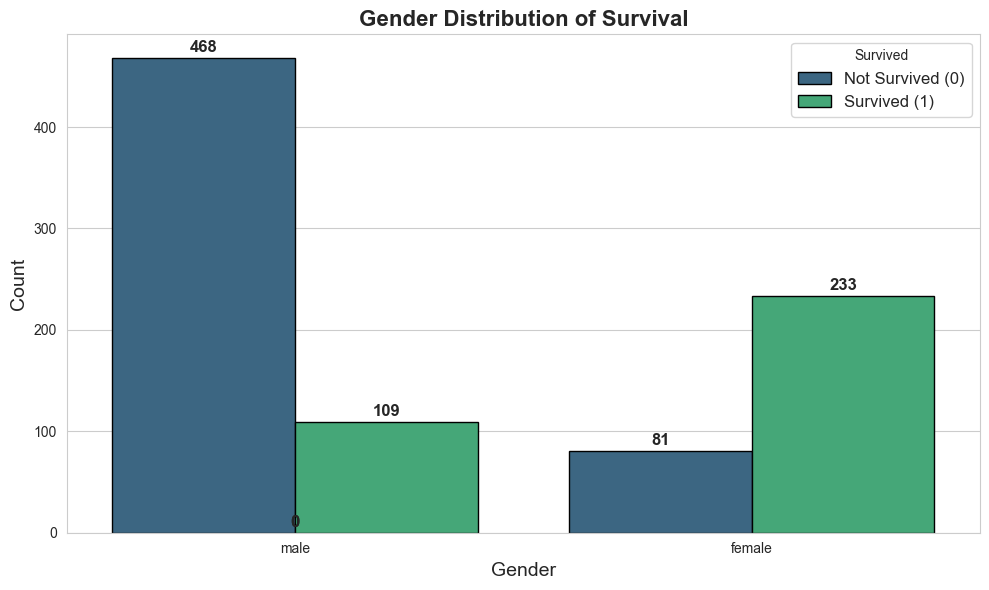

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

# Mengatur gaya plot
sns.set_style('whitegrid')

# Membuat countplot untuk fitur 'Sex' dengan hue 'Survived'
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Sex', hue='Survived', palette='viridis', edgecolor='black')

# Menambahkan judul dan label
plt.title('Gender Distribution of Survival', fontsize=16, fontweight='bold')
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.legend(title='Survived', labels=['Not Survived (0)', 'Survived (1)'], fontsize=12)

# Menambahkan anotasi di atas batang
for p in plt.gca().patches:
    height = p.get_height()
    plt.gca().text(p.get_x() + p.get_width() / 2., height + 3, f'{int(height)}', ha='center', va='bottom', fontsize=12, fontweight='bold')

# Menyesuaikan layout agar tidak terpotong
plt.tight_layout()
plt.show()


Prioritas Penyelamatan untuk Wanita:

Tingkat kelangsungan hidup wanita jauh lebih tinggi dibandingkan pria. Hal ini menunjukkan bahwa wanita memiliki prioritas lebih tinggi dalam proses penyelamatan, sesuai dengan prinsip "Women and Children First".

Hanya sebagian kecil dari penumpang pria yang selamat, sementara sebagian besar pria tidak berhasil diselamatkan. Ini menyoroti ketidaksetaraan besar dalam penyelamatan berdasarkan gender, di mana pria memiliki kemungkinan jauh lebih kecil untuk selamat.

Rasio kelangsungan hidup untuk wanita adalah sekitar 74%, sedangkan untuk pria hanya sekitar 19%. Ini menunjukkan bahwa wanita memiliki peluang hampir empat kali lipat lebih besar untuk selamat dibandingkan pria.

In [35]:
df['Pclass']

0      3
1      1
2      3
3      1
4      3
      ..
886    2
887    1
888    3
889    1
890    3
Name: Pclass, Length: 891, dtype: int64

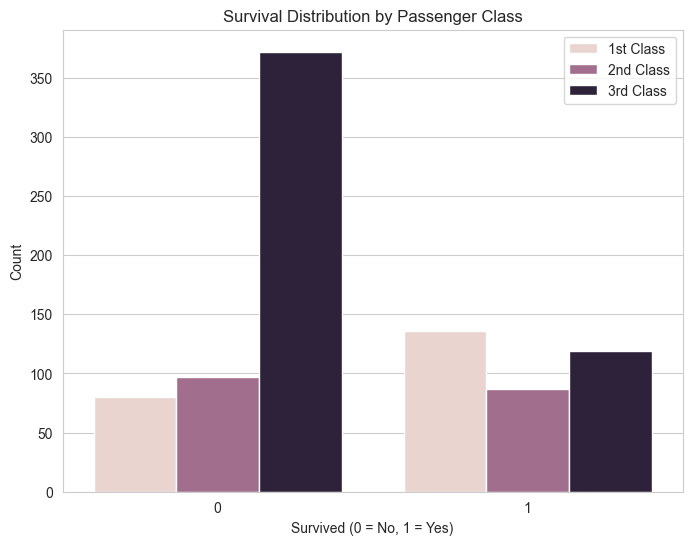

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


In [36]:
# Distribusi kelangsungan hidup berdasarkan kelas
plt.figure(figsize=(8, 6))
sns.countplot(x='Survived', hue='Pclass', data=df)
plt.title('Survival Distribution by Passenger Class')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.legend(['1st Class', '2nd Class', '3rd Class'])
plt.show()

# Persentase kelangsungan hidup berdasarkan kelas penumpang
survival_class = df.groupby('Pclass')['Survived'].mean()
print(survival_class)

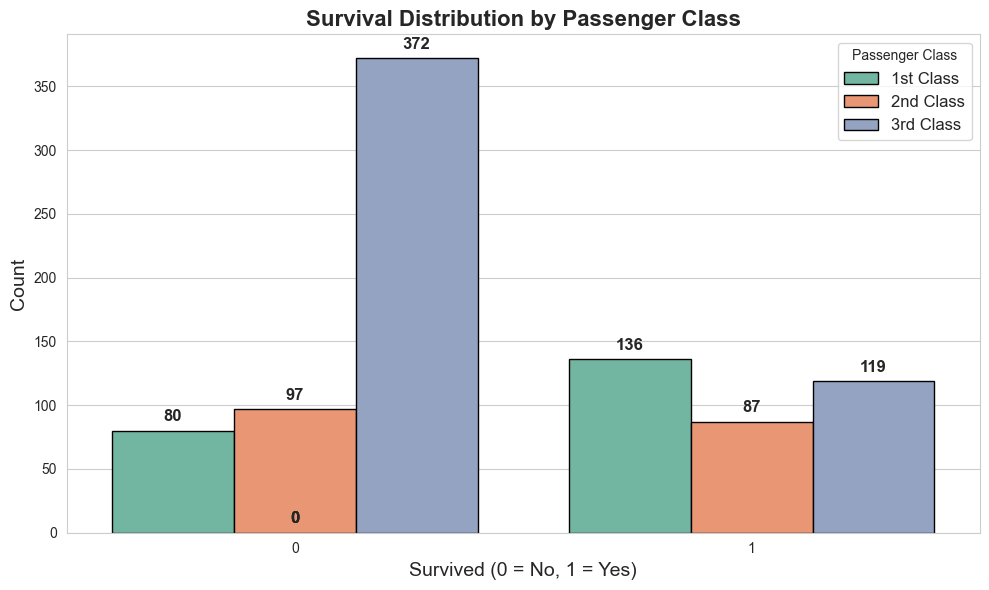

Pclass
1    62.962963
2    47.282609
3    24.236253
Name: Survived, dtype: float64


C:\Users\anasafira\AppData\Local\Temp\ipykernel_6620\2349286428.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=survival_class.index, y=survival_class.values, palette='Set2', edgecolor='black')


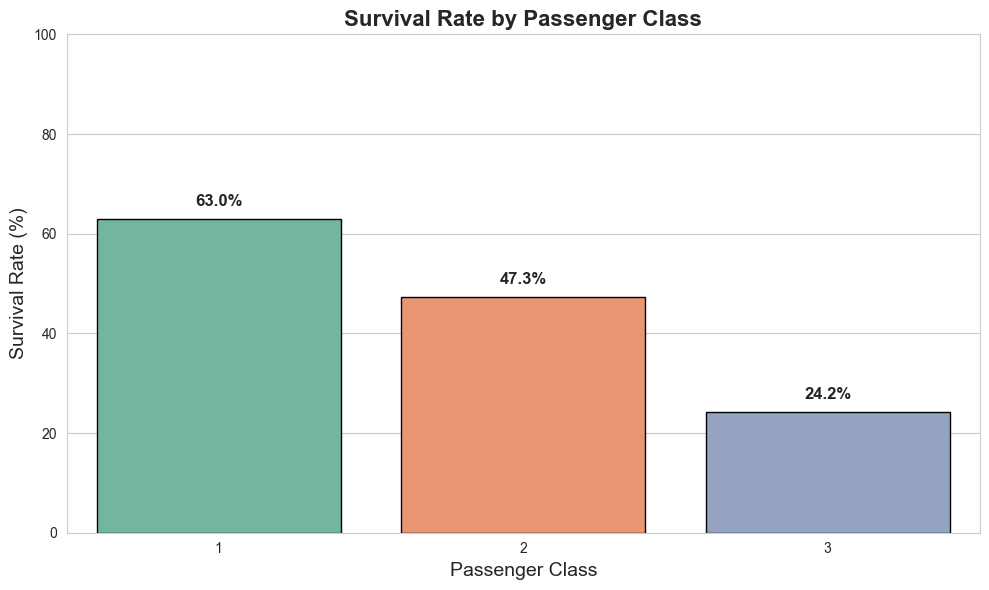

In [37]:
# Membuat plot distribusi kelangsungan hidup berdasarkan kelas penumpang
plt.figure(figsize=(10, 6))
sns.countplot(x='Survived', hue='Pclass', data=df, palette='Set2', edgecolor='black')

# Menambahkan judul dan label
plt.title('Survival Distribution by Passenger Class', fontsize=16, fontweight='bold')
plt.xlabel('Survived (0 = No, 1 = Yes)', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.legend(title='Passenger Class', labels=['1st Class', '2nd Class', '3rd Class'], fontsize=12)

# Menambahkan anotasi di atas batang
for p in plt.gca().patches:
    height = p.get_height()
    plt.gca().text(p.get_x() + p.get_width() / 2., height + 5, f'{int(height)}', ha='center', va='bottom', fontsize=12, fontweight='bold')

# Menyesuaikan layout agar tidak terpotong
plt.tight_layout()
plt.show()

# Menghitung persentase kelangsungan hidup berdasarkan kelas penumpang
survival_class = df.groupby('Pclass')['Survived'].mean() * 100
print(survival_class)

# Membuat barplot untuk menampilkan persentase kelangsungan hidup berdasarkan kelas penumpang
plt.figure(figsize=(10, 6))
sns.barplot(x=survival_class.index, y=survival_class.values, palette='Set2', edgecolor='black')
plt.title('Survival Rate by Passenger Class', fontsize=16, fontweight='bold')
plt.xlabel('Passenger Class', fontsize=14)
plt.ylabel('Survival Rate (%)', fontsize=14)

# Menambahkan anotasi persentase di atas batang
for i, v in enumerate(survival_class):
    plt.text(i, v + 2, f'{v:.1f}%', ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.ylim(0, 100)
plt.tight_layout()
plt.show()

Penumpang Kelas 1: Memiliki tingkat kelangsungan hidup tertinggi, menandakan bahwa mereka lebih diutamakan dalam penyelamatan.
Penumpang Kelas 3: Mendapat dampak paling buruk dengan tingkat kelangsungan hidup terendah

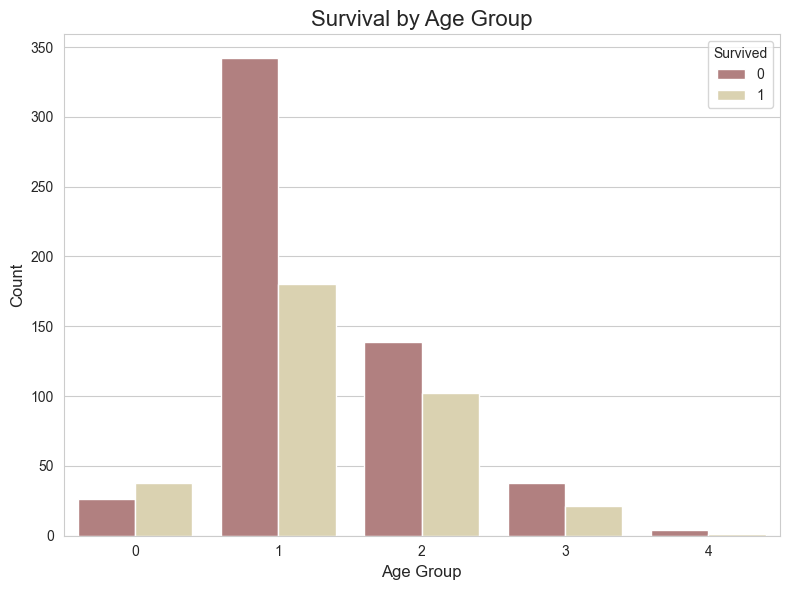

In [85]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you already have the Titanic dataset loaded as df
# Creating the age groups as shown in the image
df['AgeGroup'] = pd.cut(df['Age'], bins=[0, 10, 30, 50, 70, float('inf')], labels=[0, 1, 2, 3, 4])

# Plotting the count of survived and not survived by Age Group
plt.figure(figsize=(8, 6))
sns.countplot(x='AgeGroup', hue='Survived', data=df, palette='pink')

# Adding labels and title
plt.title('Survival by Age Group', fontsize=16)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Survived', loc='upper right', labels=['0', '1'])

# Displaying the plot
plt.tight_layout()
plt.show()


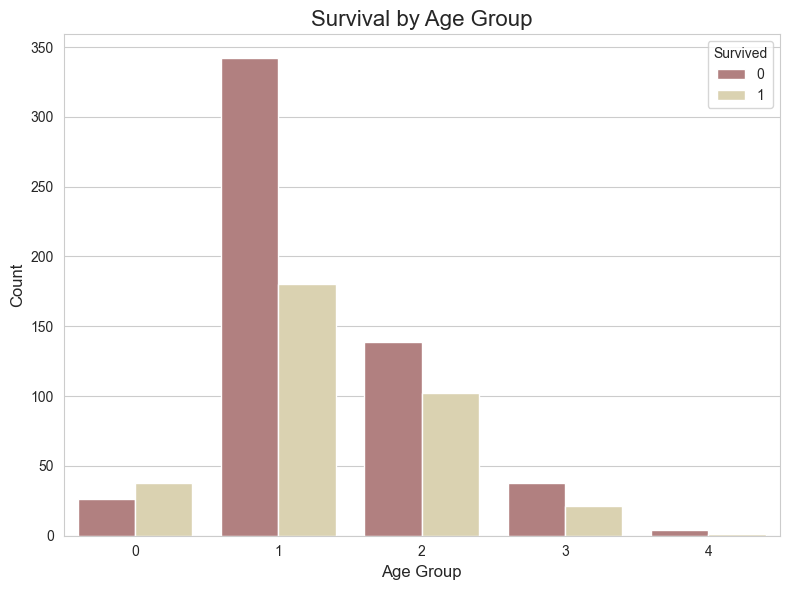

In [89]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you already have the Titanic dataset loaded as df
# Creating the age groups as shown in the image
df['AgeGroup'] = pd.cut(df['Age'], bins=[0, 10, 30, 50, 70, float('inf')], labels=[0, 1, 2, 3, 4])

# Plotting the count of survived and not survived by Age Group
plt.figure(figsize=(8, 6))
sns.countplot(x='AgeGroup', hue='Survived', data=df, palette='pink')

# Adding labels and title
plt.title('Survival by Age Group', fontsize=16)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Survived', loc='upper right', labels=['0', '1'])

# Displaying the plot
plt.tight_layout()
plt.show()



Anak-Anak (0-10 tahun):

Terdapat jumlah penumpang anak-anak yang selamat lebih banyak dibandingkan yang tidak selamat.
Ini menunjukkan bahwa anak-anak cenderung diprioritaskan dalam proses penyelamatan, sesuai dengan kebijakan "Women and Children First".

Remaja (11-20 tahun):

Lebih banyak remaja yang tidak selamat dibandingkan yang selamat. Hal ini mungkin disebabkan oleh fakta bahwa remaja tidak dianggap se-rentan anak-anak kecil dan mungkin tidak menjadi prioritas utama penyelamatan.

Dewasa Muda (21-30 tahun):

Kelompok usia ini memiliki jumlah penumpang yang tidak selamat sangat tinggi. Ini bisa jadi karena sebagian besar dari mereka adalah pria dewasa yang mungkin mengorbankan diri atau tidak menjadi prioritas dalam penyelamatan.

Dewasa (31-40 tahun):

Jumlah penumpang yang tidak selamat juga lebih tinggi pada kelompok ini. Hal ini menunjukkan bahwa meskipun mereka lebih matang, mereka tidak mendapat banyak prioritas dibandingkan dengan anak-anak dan wanita.

Lansia (41-60 tahun):

Lansia memiliki jumlah penumpang yang tidak selamat lebih banyak dibandingkan yang selamat. Keterbatasan fisik dan mobilitas mungkin membuat mereka sulit untuk mencapai sekoci penyelamat.

Usia Tua (> 60 tahun):

Jumlah penumpang yang selamat sangat sedikit, dan ini menunjukkan bahwa usia tua menjadi faktor risiko yang sangat besar dalam kondisi darurat ini.

In [40]:
df['Fare']

0       7.2500
1      71.2833
2       7.9250
3      53.1000
4       8.0500
        ...   
886    13.0000
887    30.0000
888    23.4500
889    30.0000
890     7.7500
Name: Fare, Length: 891, dtype: float64

<Figure size 1000x600 with 0 Axes>

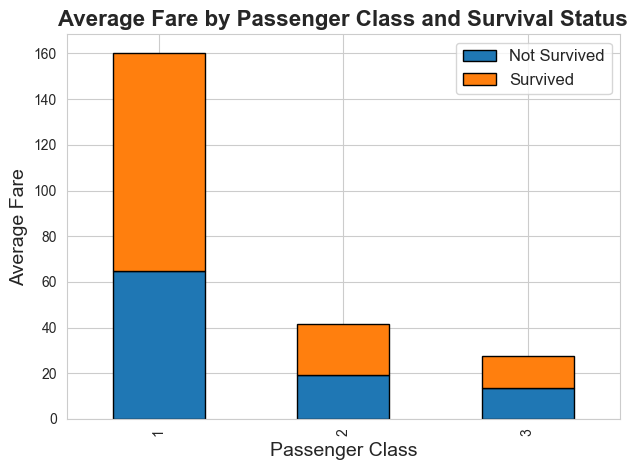

In [43]:

# Membuat barplot untuk melihat rata-rata 'Fare' berdasarkan 'Pclass' dan 'Survived'
plt.figure(figsize=(10, 6))
fare_class_survived.plot(kind='bar', stacked=True, color=['#1f77b4', '#ff7f0e'], edgecolor='black')
plt.title('Average Fare by Passenger Class and Survival Status', fontsize=16, fontweight='bold')
plt.xlabel('Passenger Class', fontsize=14)
plt.ylabel('Average Fare', fontsize=14)
plt.legend(['Not Survived', 'Survived'], fontsize=12)
plt.tight_layout()
plt.show()

Analisis kolom Fare menunjukkan bahwa harga tiket mempengaruhi tidak hanya kenyamanan perjalanan, tetapi juga peluang kelangsungan hidup penumpang Titanic. Penumpang kelas pertama, yang membayar lebih mahal, memiliki akses yang lebih baik ke fasilitas penyelamatan, sementara penumpang kelas ketiga lebih terpinggirkan, baik secara fisik di kapal maupun dalam akses ke bantuan darurat. Ini mencerminkan dampak yang signifikan dari status sosial dan ekonomi terhadap keselamatan penumpang dalam tragedi Titanic.

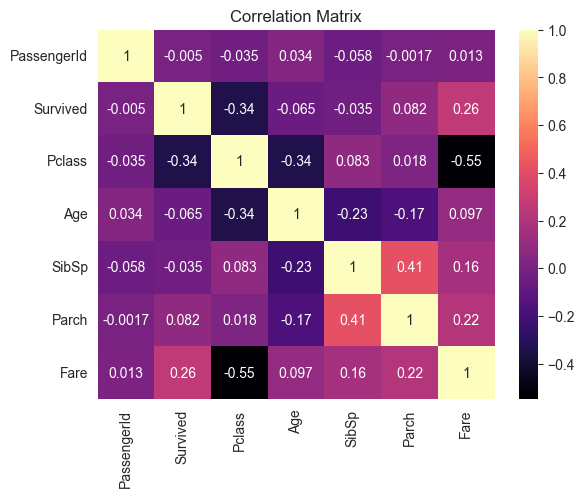

In [44]:
corr_matrix = df.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True, cmap='magma')
plt.title('Correlation Matrix')
plt.show()

Dampak Sosial dan Ekonomi: Kelas sosial (dilihat dari Pclass) dan harga tiket (Fare) memainkan peran penting dalam peluang keselamatan. 
Dampak Keluarga: Penumpang yang bepergian dengan keluarga (dilihat dari SibSp dan Parch) lebih mungkin memiliki anggota keluarga di atas kapal, tetapi ini tidak secara langsung memengaruhi peluang selamat.
Peluang Kelangsungan Hidup: Faktor ekonomi dan akses ke fasilitas (misalnya, sekoci) lebih berperan dalam menentukan keselamatan daripada usia atau ukuran keluarga.

# Feature Engineering
## Label Encoder untuk mengubah data kategorik menjadi numerik


In [45]:
from sklearn.preprocessing import LabelEncoder

In [46]:
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])
df['Embarked'] = le.fit_transform(df['Embarked'])

In [47]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,AgeRange,FareGroup
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,2,21-30,Low
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,0,31-40,Medium
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,2,21-30,Low
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2,31-40,Medium
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,2,31-40,Low


## Feature Selection

In [48]:
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
X = df[features]
y = df['Survived']

In [49]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.2500,2
1,1,0,38.0,1,0,71.2833,0
2,3,0,26.0,0,0,7.9250,2
3,1,0,35.0,1,0,53.1000,2
4,3,1,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...
886,2,1,27.0,0,0,13.0000,2
887,1,0,19.0,0,0,30.0000,2
888,3,0,28.0,1,2,23.4500,2
889,1,1,26.0,0,0,30.0000,0


In [50]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [51]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [52]:
X_train

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
331,1,1,45.5,0,0,28.5000,2
733,2,1,23.0,0,0,13.0000,2
382,3,1,32.0,0,0,7.9250,2
704,3,1,26.0,1,0,7.8542,2
813,3,0,6.0,4,2,31.2750,2
...,...,...,...,...,...,...,...
106,3,0,21.0,0,0,7.6500,2
270,1,1,28.0,0,0,31.0000,2
860,3,1,41.0,2,0,14.1083,2
435,1,0,14.0,1,2,120.0000,2


In [53]:
y_train

331    0
733    0
382    0
704    0
813    0
      ..
106    1
270    0
860    0
435    1
102    0
Name: Survived, Length: 712, dtype: int64

In [54]:
X_test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
709,3,1,28.0,1,1,15.2458,0
439,2,1,31.0,0,0,10.5000,2
840,3,1,20.0,0,0,7.9250,2
720,2,0,6.0,0,1,33.0000,2
39,3,0,14.0,1,0,11.2417,0
...,...,...,...,...,...,...,...
433,3,1,17.0,0,0,7.1250,2
773,3,1,28.0,0,0,7.2250,0
25,3,0,38.0,1,5,31.3875,2
84,2,0,17.0,0,0,10.5000,2


In [55]:
y_test

709    1
439    0
840    0
720    1
39     1
      ..
433    0
773    0
25     1
84     1
10     1
Name: Survived, Length: 179, dtype: int64

# Modeling

## Membangun classification model menggunakan Random Forest

In [56]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

- n_estimators menentukan jumlah pohon (trees) yang akan dibuat dalam Random Forest. Ketika kita set n_estimators=100, ini berarti kita akan membuat 100 pohon keputusan (decision trees) yang berbeda. Setiap pohon akan membuat prediksi, dan hasil akhir adalah kombinasi dari semua prediksi pohon tersebut.
- random_state adalah angka yang digunakan untuk mengatur "benih" acak (random seed). Penggunaan random_state memastikan bahwa hasil yang kita dapatkan dari menjalankan model selalu konsisten. Misalnya, setiap kali kita menjalankan kode dengan random_state=42, hasilnya akan sama.

# Evaluation

In [57]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

## Prediksi data test menggunakan model random forest yang sudah dibangun

In [58]:
y_pred = model.predict(X_test)

In [59]:
df_comparison = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred
})
df_comparison

,Actual,Predicted
709,1,0
439,0,0
840,0,0
720,1,1
39,1,0
...,...,...
433,0,0
773,0,0
25,1,0
84,1,1


In [60]:
## Buat confusion matrix

In [61]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[92 13]
 [19 55]]


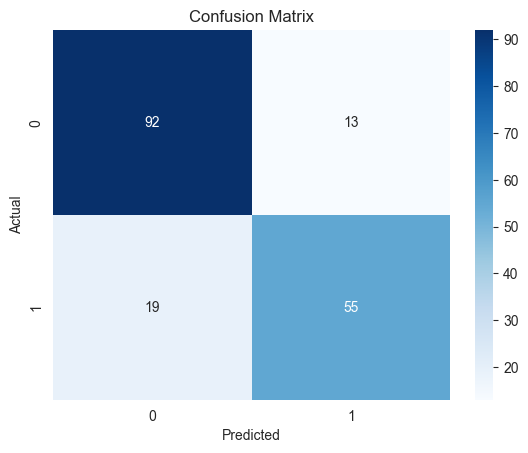

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## Hitung akurasi dari prediksi

In [63]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.82


## Feature importances (khusus random forest)

In [64]:
feature_importance = model.feature_importances_

feature_names = X_train.columns

df_feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importance
})

df_feature_importance = df_feature_importance.sort_values(by='Importance', ascending=False)
df_feature_importance

,Feature,Importance
1,Sex,0.271410
5,Fare,0.265010
2,Age,0.249995
0,Pclass,0.086957
3,SibSp,0.053685
4,Parch,0.039897
6,Embarked,0.033044


# KNN

In [65]:
from sklearn.neighbors import KNeighborsClassifier
# Melatih model K-Nearest Neighbors
knn = KNeighborsClassifier(n_neighbors=6)  # n_neighbors dapat disesuaikan
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=6)

In [66]:
# Memprediksi data uji
y_pred_1 = knn.predict(X_test)

In [67]:
df_comparison = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred_1
})
df_comparison

,Actual,Predicted
709,1,0
439,0,0
840,0,0
720,1,0
39,1,0
...,...,...
433,0,0
773,0,0
25,1,0
84,1,0


In [68]:
# Evaluasi model
accuracy = accuracy_score(y_test, y_pred_1)
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_1))

Accuracy: 0.73

Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.90      0.80       105
           1       0.78      0.49      0.60        74

    accuracy                           0.73       179
   macro avg       0.75      0.70      0.70       179
weighted avg       0.74      0.73      0.72       179



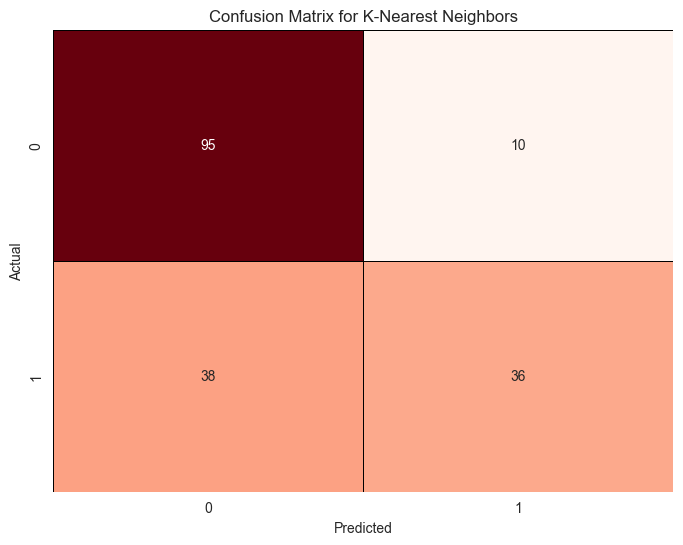

In [69]:
# Menampilkan matriks kebingungan
conf_matrix = confusion_matrix(y_test, y_pred_1)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds', cbar=False, linecolor='black', linewidths=0.5)
plt.title("Confusion Matrix for K-Nearest Neighbors")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


# SVM

In [70]:
from sklearn.svm import SVC

# Melatih model Support Vector Machine
svm = SVC(kernel='rbf')  # Gunakan 'linear' atau 'rbf' untuk kernel yang berbeda
svm.fit(X_train, y_train)

SVC()

In [71]:

# Memprediksi data uji
y_pred_2 = svm.predict(X_test)

In [72]:
# Evaluasi model
accuracy = accuracy_score(y_test, y_pred_2)
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_2))

Accuracy: 0.66

Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.94      0.76       105
           1       0.76      0.26      0.38        74

    accuracy                           0.66       179
   macro avg       0.70      0.60      0.57       179
weighted avg       0.69      0.66      0.61       179



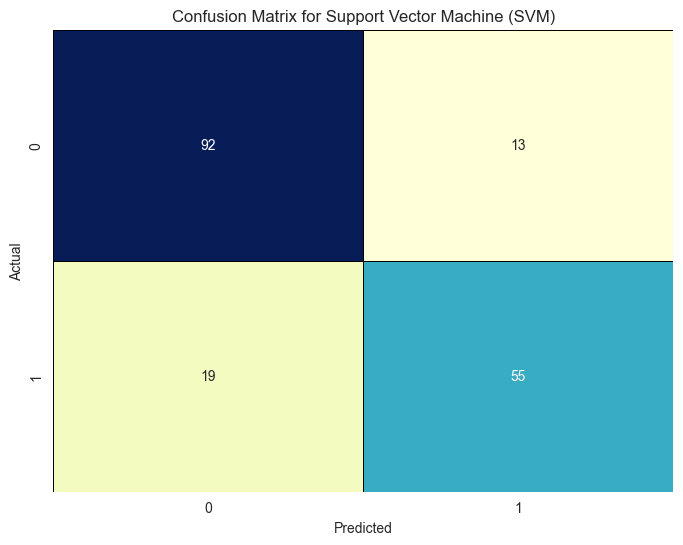

In [73]:
# Menampilkan matriks kebingungan
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='YlGnBu', cbar=False, linecolor='black', linewidths=0.5)
plt.title("Confusion Matrix for Support Vector Machine (SVM)")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## LOGISTIK REGRESSIOM

In [74]:
from sklearn.linear_model import LogisticRegression
# Melatih model Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [75]:

# Memprediksi data uji
y_pred_3 = logreg.predict(X_test)

In [76]:

# Evaluasi model
accuracy = accuracy_score(y_test, y_pred_3)
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_3))


Accuracy: 0.81

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



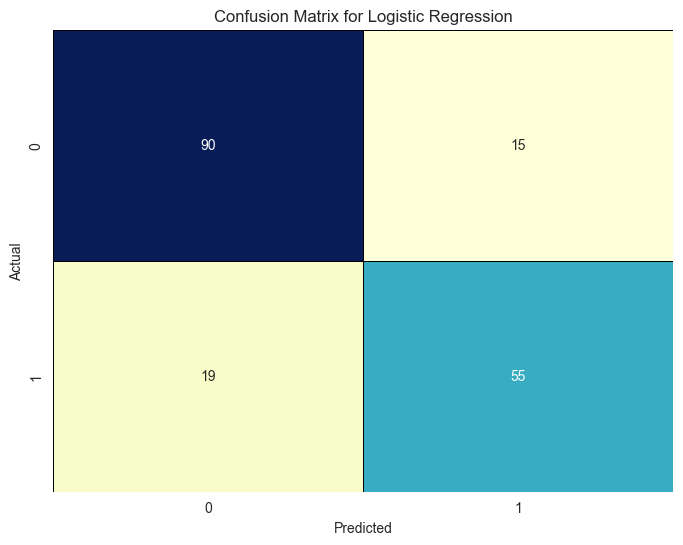

In [77]:
# Menampilkan matriks kebingungan
conf_matrix = confusion_matrix(y_test, y_pred_3)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='YlGnBu', cbar=False, linecolor='black', linewidths=0.5)
plt.title("Confusion Matrix for Logistic Regression")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [78]:
#Penyesuaian Parameter Logistic Regression
c_values = [0.01, 0.1, 1, 10, 100]
best_accuracy = 0
best_c = None
results = []

for c in c_values:
    logreg = LogisticRegression(C=c)
    logreg.fit(X_train, y_train)
    y_pred = logreg.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred_2)
    results.append((c, accuracy))
    print(f"C = {c}: Accuracy = {accuracy:.4f}")
    
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_c = c

print(f"\nBest C value: {best_c} with accuracy: {best_accuracy:.4f}")

C = 0.01: Accuracy = 0.6592
C = 0.1: Accuracy = 0.6592
C = 1: Accuracy = 0.6592
C = 10: Accuracy = 0.6592
C = 100: Accuracy = 0.6592

Best C value: 0.01 with accuracy: 0.6592


C:\Users\anasafira\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [80]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,AgeRange,FareGroup
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,2,21-30,Low
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,0,31-40,Medium
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,2,21-30,Low
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2,31-40,Medium
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,2,31-40,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,2,21-30,Low
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,2,11-20,Low
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,28.0,1,2,W./C. 6607,23.4500,2,21-30,Low
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0000,0,21-30,Low
